KELOMPOK PANDAS LOVERS:
<br>Ketua : Sendhy Boedhi
<br>Anggota :
1. Edgar Ariel Majied
2. Vionella Awanda Irsabadi
3. Teguh Ferdianto
4. R. Arnanda Adi Wijanarko
5. Faris Isham Wiryansyah
6. Jodhi Krisantus Sihalbu
7. Jannisah Dwi Rahhadisk

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
- Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat.
- Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal).
- Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain.

- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

In [49]:
df = pd.read_csv('flight.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## HASIL PENGAMATAN:

- Dataset terdiri dari 62988 baris dan 22 kolom.
- Terdapat 7 kolom yang missing value (Non-null count < Jumlah baris) yaitu: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, dan SUM_YR_2.
- FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE bertipe data object bisa diganti ke dalam datetime.
- Selain itu, sepertinya tipe data di setiap kolom sudah sesuai.

## Numeric Features

In [51]:
colm = df.select_dtypes(include=['number'])
nums = colm.columns.tolist()
colm.sample(5)

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
53527,50485,4,58.0,3,1638,2960.0,0.0,2787,663,20.000000,33,0,0.800000,1638,0
31712,36037,4,67.0,10,5205,3040.0,3118.0,13717,14,77.333333,295,1,0.503327,16794,30
3021,26654,5,47.0,46,41463,19404.0,22340.0,45258,25,15.400000,129,0,0.965011,44451,1
61668,9358,4,55.0,2,943,595.0,518.0,1547,151,351.000000,351,0,0.606451,2039,14
22397,8738,4,47.0,10,8707,5318.0,2141.0,19514,239,49.666667,204,0,0.556833,8707,0


## Non-Numerical Features

In [52]:
cols = df.select_dtypes(exclude=['number', 'datetime'])
cats = cols.columns.tolist()
cols.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
39352,12/21/2007,12/21/2007,Male,beijing,beijing,CN,3/31/2014,10/10/2013
13121,6/15/2007,2/20/2010,Male,loudi,hunan,CN,3/31/2014,3/2/2014
43211,12/4/2012,12/4/2012,Male,foshan,guangdong,CN,3/31/2014,12/20/2013
35839,8/22/2012,8/22/2012,Male,beijing,beijing,CN,3/31/2014,1/26/2014
32562,4/10/2012,4/10/2012,Female,TRIPOLE,NaN,LB,3/31/2014,3/31/2014


HASIL PENGAMATAN:

- Terdapat 15 kolom numerik.
- Terdapat 8 kolom kategorikal, di mana kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, dan LAST_FLIGHT_DATE bisa diganti menjadi tipe data datetime.

In [53]:
df.duplicated().sum()

0

In [54]:
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv],axis=1)
mdf.columns = ['Missing Value Total', 'Missing Value Percentage (%)']
mdf.sort_values(by='Missing Value Percentage (%)', ascending=False)

,Missing Value Total,Missing Value Percentage (%)
WORK_PROVINCE,3248,5.156538
WORK_CITY,2269,3.602273
SUM_YR_1,551,0.874770
AGE,420,0.666794
SUM_YR_2,138,0.219089
WORK_COUNTRY,26,0.041278
GENDER,3,0.004763
MEMBER_NO,0,0.000000
LAST_FLIGHT_DATE,0,0.000000
Points_Sum,0,0.000000


HASIL PENGAMATAN:

- Terdapat 7 kolom yang memiliki missing value, yaitu: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, dan SUM_YR_2.
- Ketujuh kolom tersebut memiliki persentase missing value < 5.2% sehingga akan di-drop saat melakukan data pre-processing.
- Kita dapat memanfaatkan library missingno untuk mengamati persebaran missing value di setiap kolom.

In [55]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


HASIL PENGAMATAN:

- Hampir semua kolom sepertinya right skewed (mean > median), kecuali kolom avg_discount, FFP_TIER, AGE.
- Sepertinya nilai maksimum dari FLIGHT_COUNT sangat berbeda jauh dengan nilai p50 dan p75. Begitu juga dengan kolom-kolom lain yang right skewed (nilai meannya jauh lebih besar dari nilai mediannya).

In [56]:
df[cats].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


HASIL PENGAMATAN:

- Kolom FFP_DATE, FIRST_FLIGHT_DATE, dan LAST_FLIGHT_DATE memiliki unique value > 700. Sebaiknya diganti menjadi datetime.
- Kolom LOAD_TIME hanya memiliki 1 unique value. Artinya, kolom ini bisa di-drop saja karena tidak bermanfaat dalam pemodelan.
- Sepertinya Kolom Gender tidak memiliki masalah, karena unique value-nya sudah berjumlah 2 dan dibuat dalam binary. Sepertinya ada sedikit ketimpangan jumlah data pada kolom ini.
- Kolom WORK_CITY, WORK_PROVINCE, dan WORK_COUNTRY memiliki kardinalitas yang tinggi.

Sekarang, kita coba tamplikan semua unique values dari setiap kolom. Hal ini perlu dilakukan untuk mengetahui apakah ada value yang tidak konsisten pada data kita.

In [57]:
for i in cats:
    total = df[i].nunique()
    print(f'unique value kolom {i}:', 'total:', total)
    print(f'{df[i].unique()}\n')

unique value kolom FFP_DATE: total: 3068
['11/2/2006' '2/19/2007' '2/1/2007' ... '5/3/2009' '1/25/2010' '5/19/2009']

unique value kolom FIRST_FLIGHT_DATE: total: 3406
['12/24/2008' '8/3/2007' '8/30/2007' ... '3/30/2014' '3/25/2014'
 '3/24/2014']

unique value kolom GENDER: total: 2
['Male' 'Female' nan]

unique value kolom WORK_CITY: total: 3234
['.' nan 'Los Angeles' ... 'BELLREGUARD' 'Danville' 'lingshui']

unique value kolom WORK_PROVINCE: total: 1165
['beijing' 'CA' 'guizhou' ... 'NOTARIO' 'TOPKPPI' 'JAWATIMUR']

unique value kolom WORK_COUNTRY: total: 118
['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX' 'CA' 'KR' 'PK' 'TH'
 'SG' 'BR' 'PE' 'AE' 'HN' 'PH' 'ID' 'MO' 'GN' 'FL' 'KH' nan 'TW' 'VN' 'DE'
 'IL' 'CH' 'PA' 'VT' 'EC' 'NG' 'BI' 'GT' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO'
 'CC' 'UV' 'MN' 'UK' 'AS' 'IT' 'OM' 'SE' 'BZ' 'IN' 'KZ' 'PT' 'NO' 'MS'
 'FI' 'UZ' 'NE' 'AT' 'AA' 'HU' 'CY' 'EG' 'MA' '中' 'ES' 'MZ' 'IR' 'SW' 'RE'
 'PS' 'KE' 'SN' 'BB' 'AZ' 'UA' 'LB' 'YE' 'GE' 'SI' 'KA' 'MV' 'RO' 'ZA

HASIL PENGAMATAN:

- Sepertinya setiap unique value pada kolom WORK_CITY dan WORK_PROVINCE perlu dicek konsitensi penulisannya, karena ada value yang lowercase, capitalize, dan uppercase sehingga hal ini perlu disamakan.
- Terdapat unique value dengan penulisan mandarin pada kolom WORK_COUNTRY sehingga ini juga perlu diperbaiki. Contonya 芬, 沈, dan lainnya.
- Selain itu, sepertinya tidak ada masalah yang berarti.

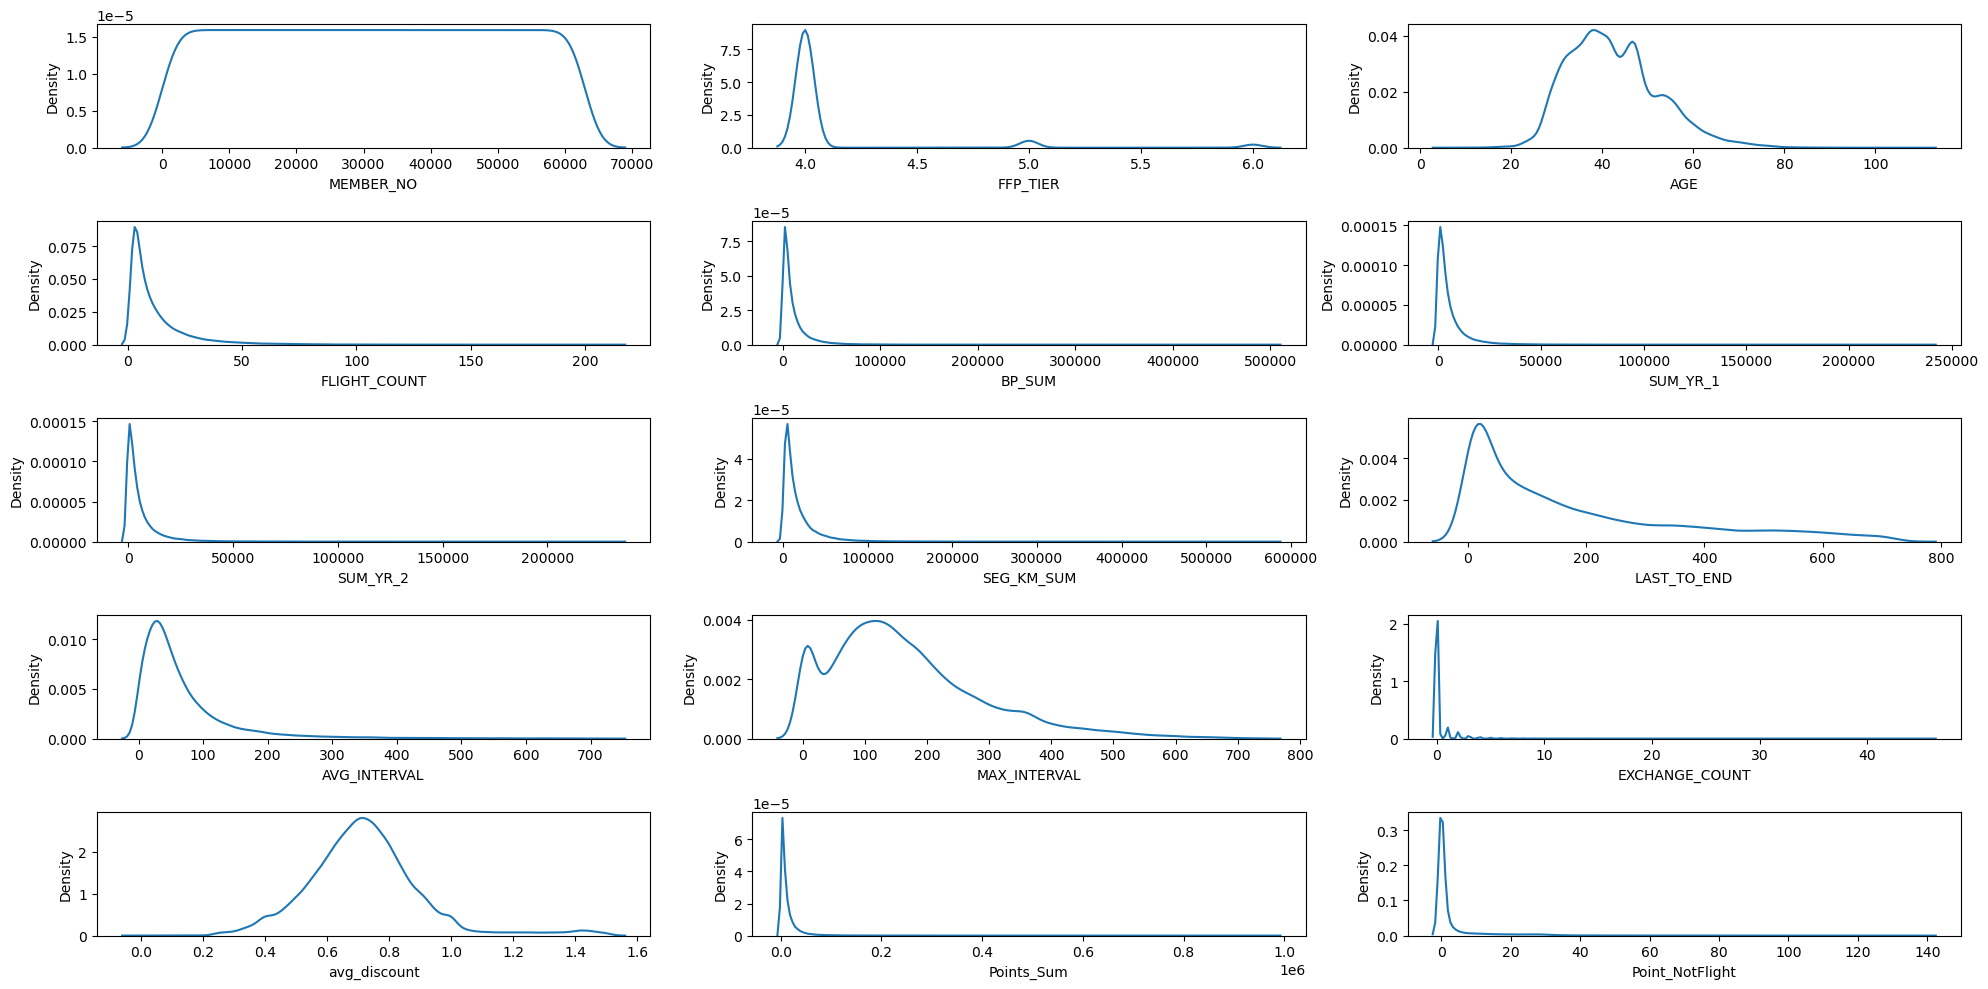

In [58]:
plt.figure(figsize=(20,10))
for i in range(len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[nums[i]])
plt.tight_layout()

HASIL PENGAMATAN:

Kolom avg_discount, FFP_TIER, AGE memiliki distribusi data yang normal. Selain itu, kolom lainnya memiliki distribusi right skewed.

<AxesSubplot:>

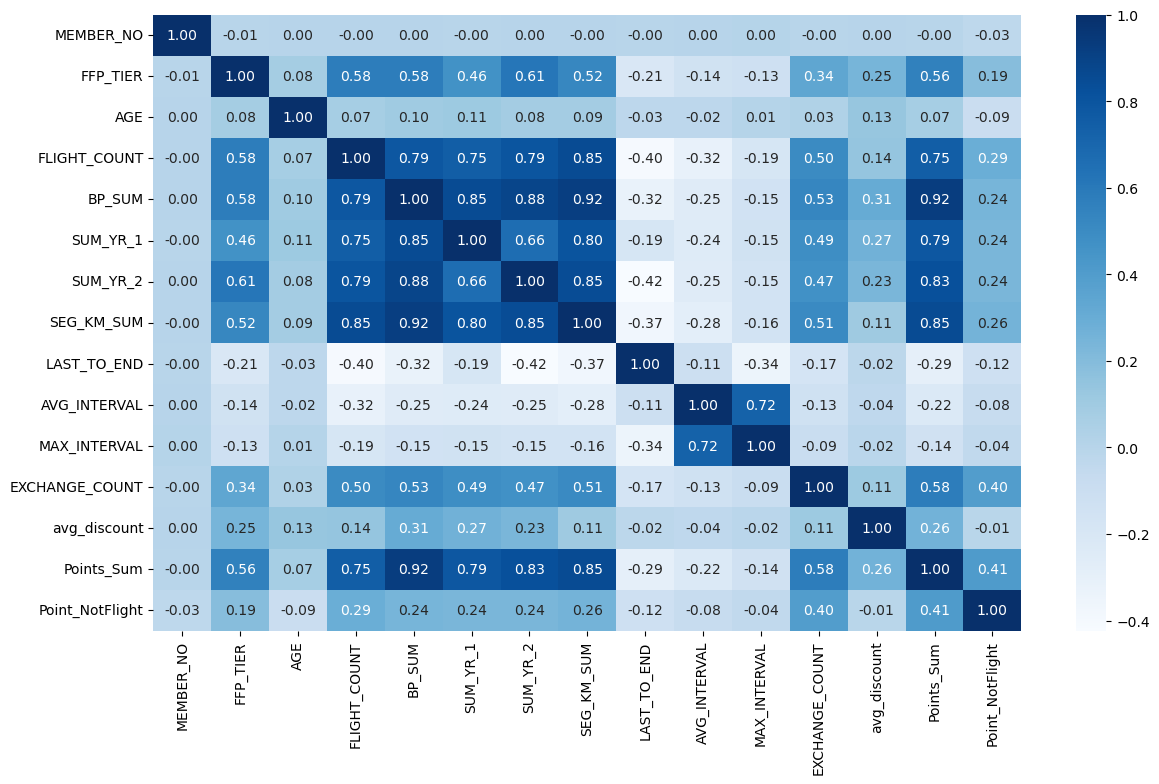

In [59]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# HASIL PENGAMATAN:
- Kolom `FLIGHT_COUNT` memiliki korelasi yang kuat >= 0.75 dengan beberapa kolom seperti kolom `Ponit_ Sum`, `SEG_KM_SUM`,`SUM_YR_2`, `SUM_YR_1`, `BP_SUM`.
- Kolom `BP_SUM` memiliki korelasi yang kuat >= 0.88 dengan beberapa kolom seperti kolom `Points_Sum`, `SEG_KM_SUM`, `SUM_YR_2`, `SUM_YR_1`.
- Kolom `SUM_YR1` memiliki korelasi yang kuat >= 0.79 dengan kolom `Points_Sum` dan `SEG_KM_SUM`.
- Kolom `SUM_YR2` memiliki korelasi yang kuat >= 0.83 dengan kolom `Points_Sum` dan `SEG_KM_SUM`.
- Kolom `SEG_KM_SUM` memiliki korelasi yang kuat 0.85 dengan kolom `Points_Sum`.

## Pre-processing
untuk Fitur yang kami pilih untuk clustering yaitu:

- Recency (R) : 'LAST_TO_END'
- Frequency (F) : 'FlightCount/BulanTerbang'
- Monetary (M) : 'FareRevenue/Bulan'

In [61]:
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
# bulan Februari (2), hanya memiliki 28 hari, sehingga harus diubah menjadi tgl 28
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00','2014/2/28  0:00:00')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

df['BulanTerbang'] = (df['LAST_FLIGHT_DATE'].dt.year - df['FIRST_FLIGHT_DATE'].dt.year) * 12 + (df['LAST_FLIGHT_DATE'].dt.month - df['FIRST_FLIGHT_DATE'].dt.month)
df['FlightCount/BulanTerbang'] = df['FLIGHT_COUNT']/df['BulanTerbang']

df['FareRevenue/Bulan'] = df['SUM_YR_1']/df['BulanTerbang']


In [62]:
df[['FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','BulanTerbang','FlightCount/BulanTerbang','FareRevenue/Bulan']]

,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,BulanTerbang,FlightCount/BulanTerbang,FareRevenue/Bulan
0,2008-12-24,2014-03-31,63,3.333333,3802.539683
1,2007-08-03,2014-03-25,79,1.772152,2170.670886
2,2007-08-30,2014-03-21,79,1.708861,2071.113924
3,2008-08-23,2013-12-26,64,0.359375,1817.968750
4,2009-04-15,2014-03-27,59,2.576271,2111.186441
...,...,...,...,...,...
62983,2013-06-05,2013-06-09,0,inf,NaN
62984,2013-09-14,2014-01-03,4,1.000000,0.000000
62985,2006-12-02,2014-03-03,87,0.022989,0.000000
62986,2013-02-14,2013-02-26,0,inf,NaN


In [63]:
features = ['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']
dt = df[features]
dt

,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan
0,1,3.333333,3802.539683
1,7,1.772152,2170.670886
2,11,1.708861,2071.113924
3,97,0.359375,1817.968750
4,5,2.576271,2111.186441
...,...,...,...
62983,297,inf,NaN
62984,89,1.000000,0.000000
62985,29,0.022989,0.000000
62986,400,inf,NaN


In [64]:
dt.isna().sum()

LAST_TO_END                    0
FlightCount/BulanTerbang       0
FareRevenue/Bulan           1457
dtype: int64

In [65]:
np.isinf(dt).sum()

LAST_TO_END                    0
FlightCount/BulanTerbang    2692
FareRevenue/Bulan           1637
dtype: int64

In [66]:
dt.dtypes

LAST_TO_END                   int64
FlightCount/BulanTerbang    float64
FareRevenue/Bulan           float64
dtype: object

Boxplot Sebelum Handling Outlier


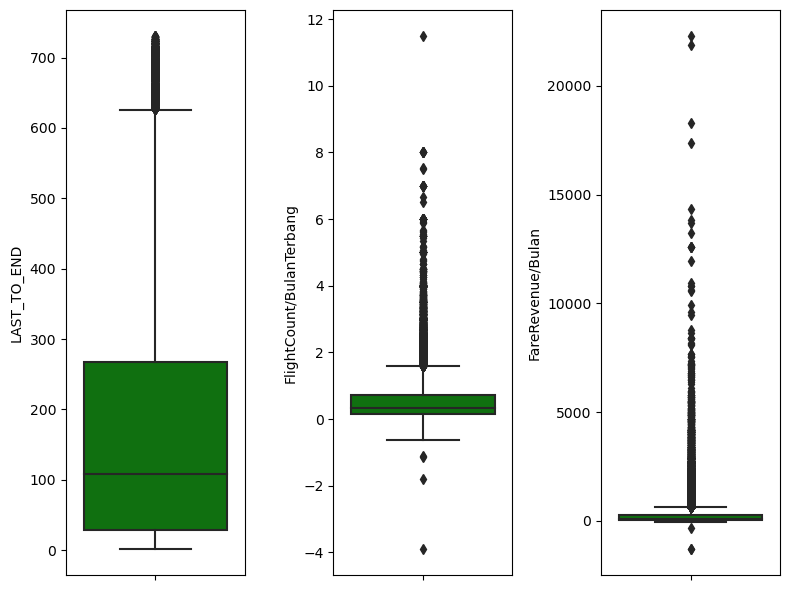

In [67]:
# Boxplot sebelum handling outlier
features2 = ['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']

cols = features2

print('Boxplot Sebelum Handling Outlier')
plt.figure(figsize=(8,6))
for i in range(0, len(cols)):
    plt.subplot(1,len(cols), i+1)
    sns.boxplot(y=dt[cols[i]],color='green', orient='V')
    plt.tight_layout()

In [68]:
features2 = ['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']
for i in features2:
    Q1 = dt[i].quantile(0.25)
    Q3 = dt[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    dt = dt[ (dt[i]>low_limit) & (dt[i]<high_limit) ]

Boxplot Setelah Heandling Outlier


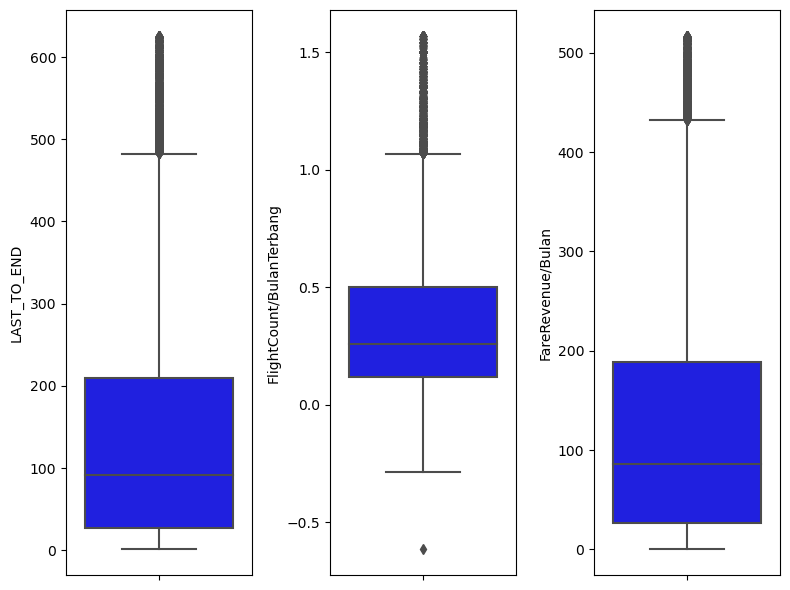

In [69]:
# Boxplot Setelah Handeling Outlier
cols = features2

print('Boxplot Setelah Heandling Outlier')
plt.figure(figsize=(8,6))
for i in range(0, len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=dt[cols[i]], color='blue', orient='V')
    plt.tight_layout()

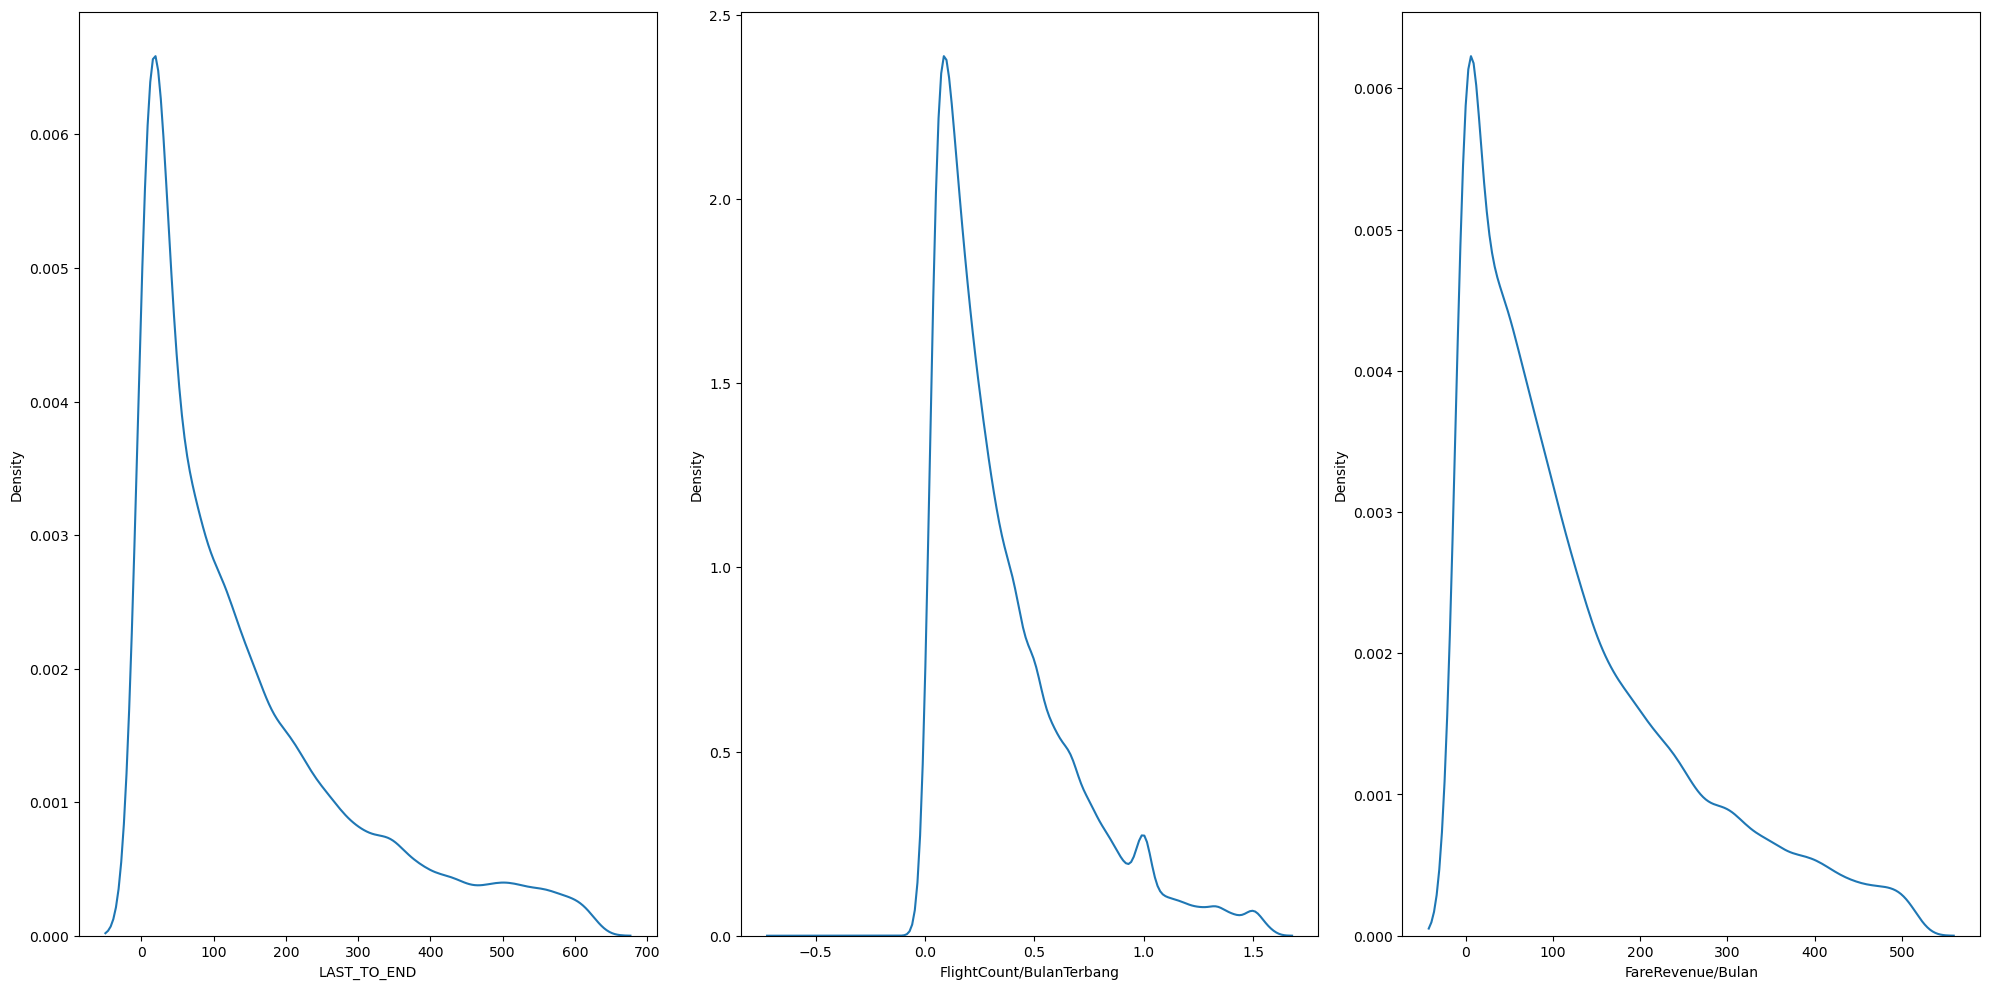

In [70]:
# Mari kita liat KDE plotnya setelah di handeling outlier
plt.figure(figsize=(20,10))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.kdeplot(x = dt[cols[i]])
plt.tight_layout()

In [71]:
# Check Infinit value after remove outlier
np.isinf(dt).sum()

LAST_TO_END                 0
FlightCount/BulanTerbang    0
FareRevenue/Bulan           0
dtype: int64

In [72]:
data = dt[['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']]
print(data.shape)
data.head()

(51311, 3)


,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan
58,15,0.518868,500.254717
59,21,0.703704,496.703704
84,9,0.898148,513.555556
120,2,0.942857,504.723810
121,27,0.373832,317.691589


In [73]:
df_lrfmc = data.copy()
df_lrfmc.columns = ['recency','frequency','monetary']
# df_lrfmc_drop = df_lrfmc[['recency','frequency','monetary']]

In [74]:
df_lrfmc.head()

,recency,frequency,monetary
58,15,0.518868,500.254717
59,21,0.703704,496.703704
84,9,0.898148,513.555556
120,2,0.942857,504.723810
121,27,0.373832,317.691589


In [75]:
df_lrfmc.describe()

,recency,frequency,monetary
count,51311.000000,51311.000000,51311.000000
mean,142.520707,0.356478,124.651608
std,147.800166,0.311505,123.398323
min,1.000000,-0.615385,0.000000
25%,27.000000,0.120000,27.042328
50%,91.000000,0.258065,86.181818
75%,209.000000,0.500000,189.062745
max,626.000000,1.571429,517.083333


In [76]:
rfm_log = df_lrfmc.copy()

In [78]:
df_std=rfm_log
df_std

,recency,frequency,monetary
58,15,0.518868,500.254717
59,21,0.703704,496.703704
84,9,0.898148,513.555556
120,2,0.942857,504.723810
121,27,0.373832,317.691589
...,...,...,...
62976,39,0.062500,8.875000
62978,282,0.076923,0.000000
62981,178,0.090909,0.000000
62984,89,1.000000,0.000000


In [79]:
from sklearn.preprocessing import MinMaxScaler

df_std = rfm_log
scale = MinMaxScaler()
kolom_all = ['recency', 'frequency', 'monetary']
for kolom in kolom_all:
    df_std[kolom] = scale.fit_transform(df_std[[kolom]])
df_std.head()

,recency,frequency,monetary
58,0.0224,0.518678,0.967455
59,0.0320,0.603201,0.960587
84,0.0128,0.692118,0.993178
120,0.0016,0.712563,0.976098
121,0.0416,0.452355,0.614391


In [80]:
df_std.describe()

,recency,frequency,monetary
count,51311.000000,51311.000000,51311.000000
mean,0.226433,0.444420,0.241067
std,0.236480,0.142447,0.238643
min,0.000000,0.000000,0.000000
25%,0.041600,0.336281,0.052298
50%,0.144000,0.399416,0.166669
75%,0.332800,0.510050,0.365633
max,1.000000,1.000000,1.000000


## Modelling

<AxesSubplot:>

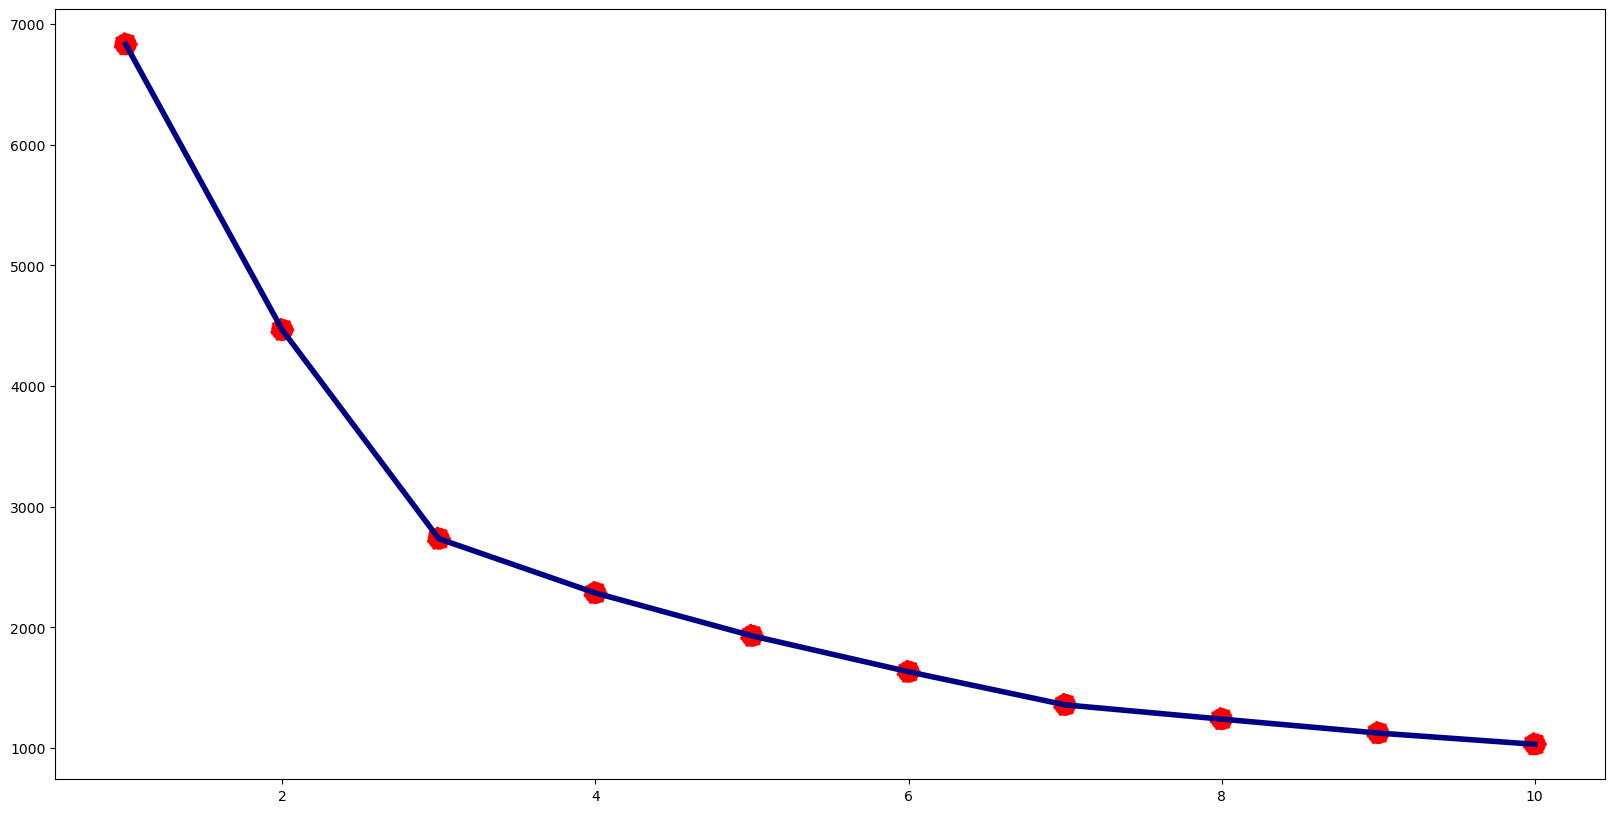

In [81]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    k_m= KMeans(n_clusters=i, random_state=142)
    k_m.fit(df_std)
    inertia.append(k_m.inertia_)
plt.figure(figsize=(20,10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth=4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='Red', linestyle='--')

In [82]:
k_m = KMeans(n_clusters=3, random_state=1).fit(df_std)

df_data_std= pd.DataFrame(data=df_std, columns=list(data))

df_data_std['clusters']= k_m.labels_
data['clusters']= k_m.labels_
print(data.shape)
data.head(3)

(51311, 4)


,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan,clusters
58,15,0.518868,500.254717,0
59,21,0.703704,496.703704,0
84,9,0.898148,513.555556,0


In [83]:
data.groupby('clusters').mean()

,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan
clusters,,,
0,94.321230,0.672737,306.619641
1,83.064216,0.288887,61.265256
2,400.096410,0.193819,112.805309


In [84]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pcs = pca.fit_transform(df_std)

In [85]:
data_pca = pd.DataFrame(data= pcs, columns=['PC 1', 'PC 2'])

data_pca.head()

,PC 1,PC 2
0,0.722977,0.008983
1,0.747795,0.009748
2,0.816228,-0.005938
3,0.811736,-0.023105
4,0.378658,-0.069423


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

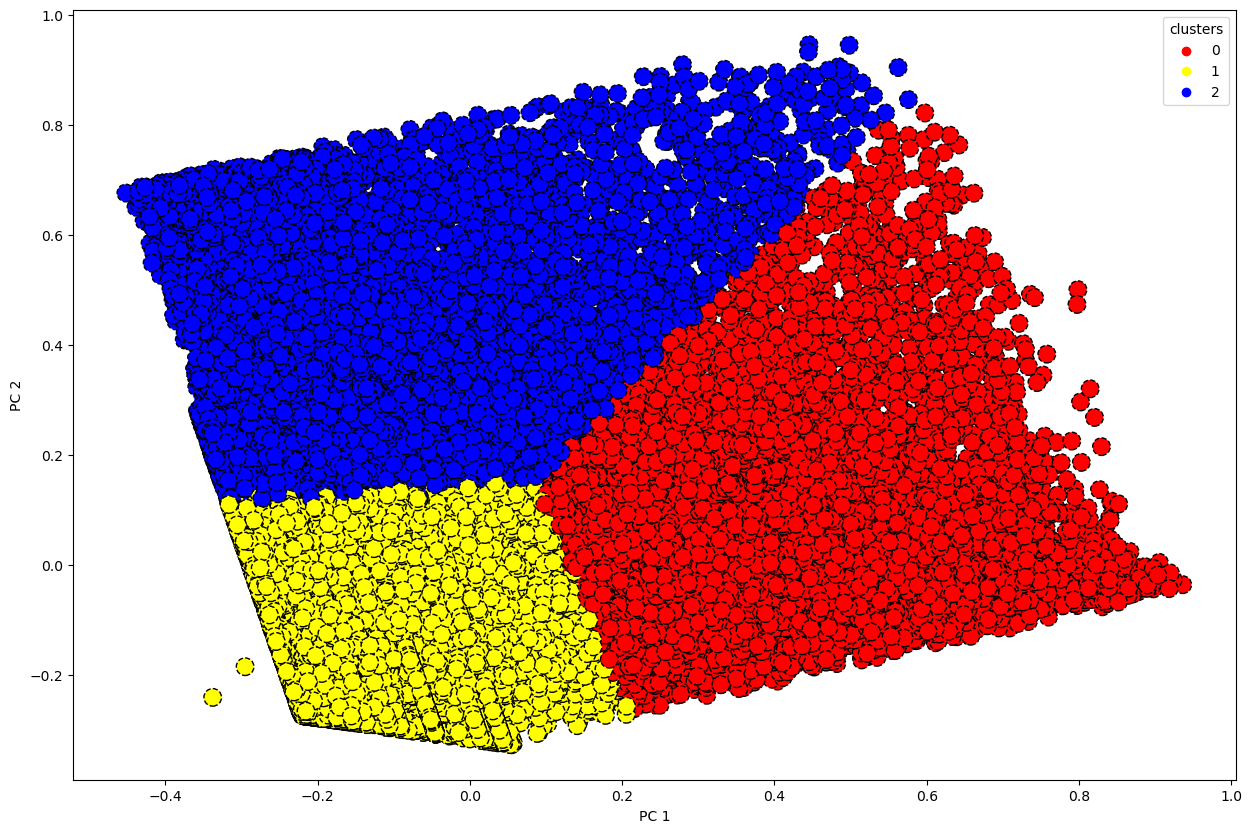

In [86]:
data_pca['clusters'] = data['clusters'].values

fig, ax = plt.subplots(figsize = (15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['Red', 'yellow', 'Blue'],
    s=160,
    ax=ax)


In [94]:
hasil = data.copy()

hasil.columns = ['recency', 'frequency', 'Monetary', 'clusters']
hasil= hasil.groupby('clusters').agg(['mean', 'median'])
hasil

recency        frequency              Monetary            
                mean median      mean    median        mean      median
clusters                                                               
0          94.321230   56.0  0.672737  0.619048  306.619641  290.615385
1          83.064216   67.0  0.288887  0.210526   61.265256   50.383838
2         400.096410  379.0  0.193819  0.134615  112.805309   84.666667

## Segmentasi
- 0 = High-Value Passengers (Important)

Memiliki nilai recency, frequency, dan monetary yang tinggi, menunjukkan bahwa penumpang dalam klaster ini adalah penumpang aktif dengan kontribusi pendapatan yang signifikan bagi maskapai.
- 1 = Mid-Value Passengers (Potensial). 
  
Menunjukkan penumpang dengan tingkat aktivitas dan kontribusi pendapatan rendah
- 2 = Low-Value Passengers (Low - Potensial).

Menunjukkan penumpang yang jarang terbang dengan kontribusi pendapatan yang lebih sedang

## Rekomendasi Bisnis:
### Cluster 0
- Menawarkan program loyalitas eksklusif kepada penumpang dalam klaster ini dengan memberikan keuntungan tambahan seperti prioritas boarding.
- Memberikan penawaran diskon atau promosi khusus kepada penumpang dalam klaster ini, dengan mengirimkan mereka kode promo melalui email atau aplikasi mobile untuk mendorong mereka untuk melakukan lebih banyak penerbangan atau memesan tiket lebih awal.

### Cluster 1:

- Mengajak penumpang dalam cluster ini untuk bergabung dengan program kesetiaan yang memberikan insentif, seperti poin reward atau diskon khusus untuk setiap penerbangan berikutnya untuk mendorong mereka melakukan penerbangan lebih sering dan memperoleh manfaat ekstra.
- Menawarkan paket perjalanan yang menggabungkan tiket pesawat dengan akomodasi atau layanan tambahan seperti hotel dengan harga spesial, untuk mendorong mereka melakukan penerbangan lebih sering dan memperoleh manfaat ekstra.


### Cluster 2:

- Menawarkan promosi menarik, seperti diskon khusus atau penawaran spesial, diberikan promo berupa cash back atau voucher yang menarik sehingga mereka dapat kembali untuk melakukan transaksi. Hal ini karena biaya untuk mempertahankan customer 5 - 25 kali lebih murah dibandingkan untuk mencari customer baru.
- Memberikan fleksibilitas lebih dalam pembayaran, misalnya dengan tarif yang lebih murah atau di-refund.